# Atividade 3 -  Som
## Princípios de percepção visual e cognição. Resultados de classificadores. 

Data: 29/03/2025

Aula de Visalização de Dados - PMD - IFES

## Visualização de áudio no domínio do tempo, frequência e espectograma:
(Transformação de áudio em grave/agudo)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [23]:
# Carregar arquivo de áudio original
#audio_path = "../../datasets/audio_teste.wav" # Substitua pelo seu arquivo
audio_path =  "../../datasets/WhatsApp Ptt 2025-03-29 at 15.28.43.ogg"
y, sr = librosa.load(audio_path, sr=None)

/home/sandro/anaconda3/lib/python3.12/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [24]:
# Modificar pitch (graves e agudos)
y_grave = librosa.effects.pitch_shift(y, sr=sr, n_steps=-5) # -5 semitons → mais grave
y_agudo = librosa.effects.pitch_shift(y, sr=sr, n_steps=+5) # +5 semitons → mais agudo

In [25]:
# Salvar os áudios modificados
sf.write("audio_grave2.wav", y_grave, sr)
sf.write("audio_agudo2.wav", y_agudo, sr)

In [26]:
# Função para plotar gráficos
def plot_audio(y, sr, titulo):
    plt.figure(figsize=(10, 3))
    # Forma de onda
    plt.subplot(1, 3, 1)
    #librosa.display.waveshow(y, sr=sr) # Não é compatível com matplotlib. Usei código abaixo
    plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
    plt.title(f"Onda - {titulo}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Amplitude")
    # Espectro de frequência (FFT) - Magnitude (Valor Absoluto)
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(fft), 1/sr)
    magnitude = np.abs(fft[:len(fft)//2]) # Pegamos apenas a parte positiva e calculamos o valorabsoluto
    plt.subplot(1, 3, 2)
    plt.plot(freqs[:len(freqs)//2], magnitude) # Magnitude (Valor Absoluto)
    plt.title(f"Frequências - {titulo}")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (Valor Absoluto)")
    # Espectrograma
    plt.subplot(1, 3, 3)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Espectrograma - {titulo}")
    plt.tight_layout()
    plt.show()

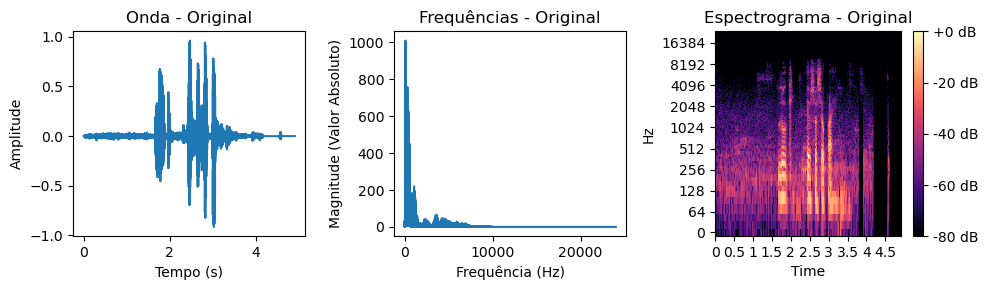

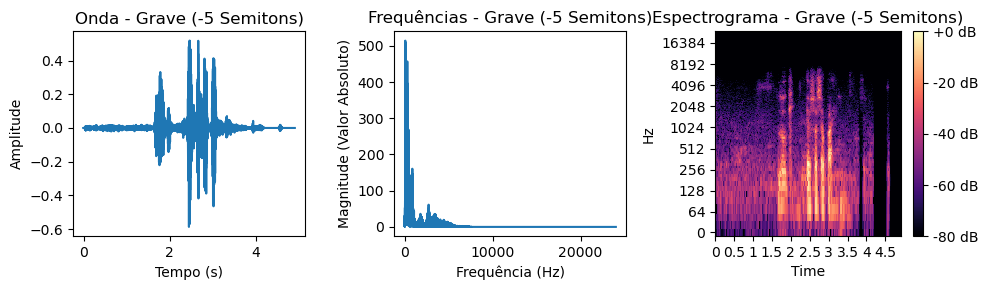

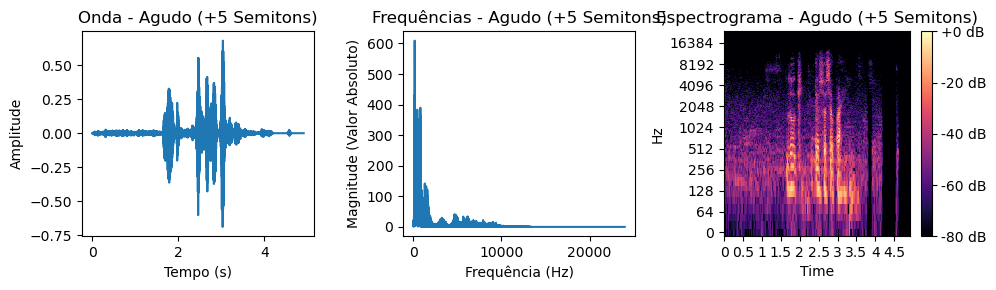

In [27]:
# Plotando os três áudios (Original, Grave e Agudo)
plot_audio(y, sr, "Original")
plot_audio(y_grave, sr, "Grave (-5 Semitons)")
plot_audio(y_agudo, sr, "Agudo (+5 Semitons)")

## Reconhecimento de texto e análise de intensidade de áudio:

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr

In [18]:
# Carregar o arquivo de áudio
audio_path = "../../datasets/audio_teste.wav" # Substitua pelo caminho correto do seu arquivo
y, sample_rate = librosa.load(audio_path, sr=None) 

In [19]:
# Converter fala em texto (Speech-to-Text)
recognizer = sr.Recognizer()
try:
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
        texto = recognizer.recognize_google(audio_data, language='pt-BR')
    print("Texto extraído do áudio:", texto)
except sr.UnknownValueError:
    print("Não foi possível entender o áudio.")
except sr.RequestError:
    print("Erro ao acessar o serviço de reconhecimento de fala.")
except Exception as e:
    print(f"Erro inesperado: {e}")

Texto extraído do áudio: Boa tarde a todos seja muito bem-vindos


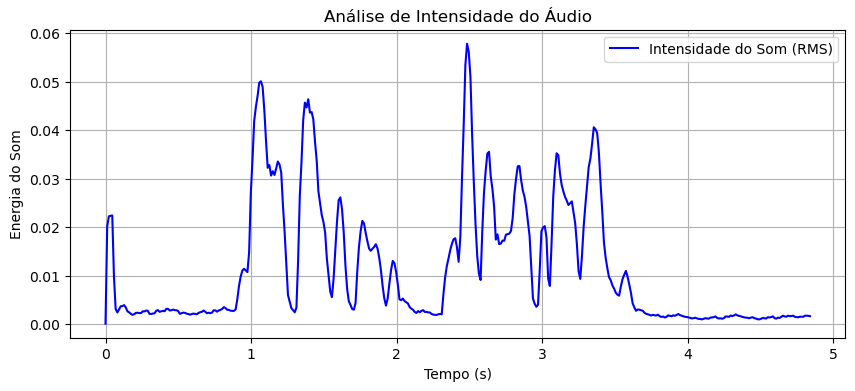

In [21]:
# Análise de intensidade do som (RMS - Root Mean Square)
rms = librosa.feature.rms(y=y)[0]
tempo = librosa.times_like(rms, sr=sample_rate) # Ajustando a variável 'sr' para 'sample_rate'
# Plotando a intensidade do som ao longo do tempo
plt.figure(figsize=(10, 4))
plt.plot(tempo, rms, label="Intensidade do Som (RMS)", color='b')
plt.xlabel("Tempo (s)")
plt.ylabel("Energia do Som")
plt.title("Análise de Intensidade do Áudio")
plt.legend()
plt.grid(True)
plt.show()